In [ ]:
!pip install lasio
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import all dependencies and stretch the data limit
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import lasio

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

#Function to add your lasfile and embed the tops of intervals
#source_dir = directory of your data
#lasfile = LAS file name
#topsfile = Tops data file name
def InputWell(source_dir,lasfile, topsfile):
  #Import your LAS file and convert it to a dataframe
  l = lasio.read(f"{source_dir}/{lasfile}")
  data = l.df()
  print(data.columns)
  data = data.replace('-999.00000',np.nan)
  #data.index.names = ['DEPT']
  well = l.well.WELL.value    #This contain your well name
  data['WELL'] = well         #This contain your log data

  #Import your tops of interval
  tops = pd.read_csv(f"{source_dir}/{topsfile}", sep='\t')
  print(tops.columns)
  tops_unit = tops['ROCK UNIT'].unique()    #This contain list of interval, adjust the column name to suit yours
  print(tops_unit)
  #Assign interval name to each point in your log data
  data_well = pd.DataFrame()
  for i in range(len(tops_unit)):
    top = tops.iloc[i]['DEPTH']
    if i < len(tops_unit)-1:
      bottom = tops.iloc[i+1]['DEPTH']
    else:
      bottom = int(round(data.tail(1).index.item()))
    data_interval = data.iloc[top:bottom, :]
    data_interval['INTERVAL'] = tops.iloc[i]['ROCK UNIT']
    data_well = data_well.append(data_interval)
  data = data_well

  return well,data

In [ ]:
def plot_log(data,log):
  fig = plt.gcf()
  fig.set_size_inches(18, 4)
  #fig.gca().invert_yaxis()
  plt.tick_params(labelsize=10)
  #plt.xlim([0,600])
  plt.ylabel(log,{'fontsize': 10, 'fontweight' : 5})
  plt.xlabel('Depth (m)',{'fontsize': 10, 'fontweight' : 5})
  plt.plot(data.index,data[log])
  plt.grid()
  plt.legend()

In [ ]:
source_dir ='/content/drive/MyDrive/[2020] Genting/WellAlaska'
lasfile1 = 'WA1.LAS'
topsfile1 = 'WA1TOPS.txt'
lasfile2 = 'WA2.LAS'
topsfile2 = 'WA2TOPS.txt'

well1, data1 = InputWell(source_dir,lasfile1,topsfile1)
well2, data2 = InputWell(source_dir,lasfile2,topsfile2)

Index(['SP', 'GR', 'CALI', 'BITSIZE', 'LL8', 'ILM', 'ILD', 'RHOB', 'NPHI',
       'DT', 'MUDWGT'],
      dtype='object')
Index(['WELL NAME', 'ROCK UNIT', 'DEPTH'], dtype='object')
['Surficial Deposits and/or Gubik Formation' 'Torok Formation'
 'Pebble Shale Unit' 'Kingak Shale' 'Sag River Sandstone'
 'Shublik Formation' 'Basement Complex']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['SP', 'GR', 'CALI', 'BITSIZE', 'MSFL', 'LLD', 'LLS', 'RHOB', 'NPHI',
       'DT', 'MUDWGT'],
      dtype='object')
Index(['WELL NAME', 'ROCK UNIT', 'DEPTH'], dtype='object')
['Surficial Deposits and/or Gubik Formation' 'Torok Formation'
 'Pebble Shale Unit' 'Kingak Shale' 'Sag River Sandstone'
 'Shublik Formation' 'Basement Complex']


No handles with labels found to put in legend.


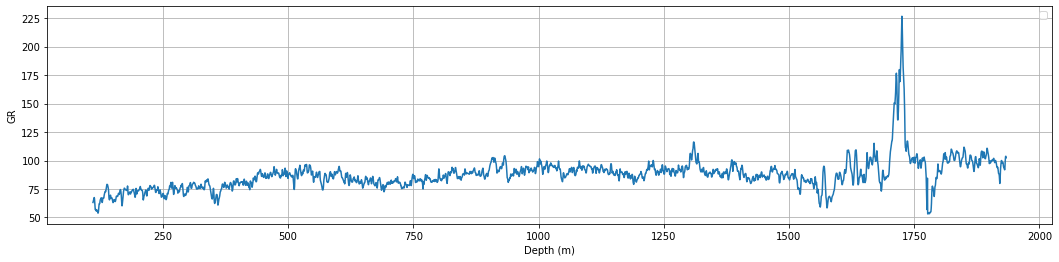

In [ ]:
data1['GR'] = data1['GR']#.rolling(100).mean()
plot_log(data1,'GR')

No handles with labels found to put in legend.


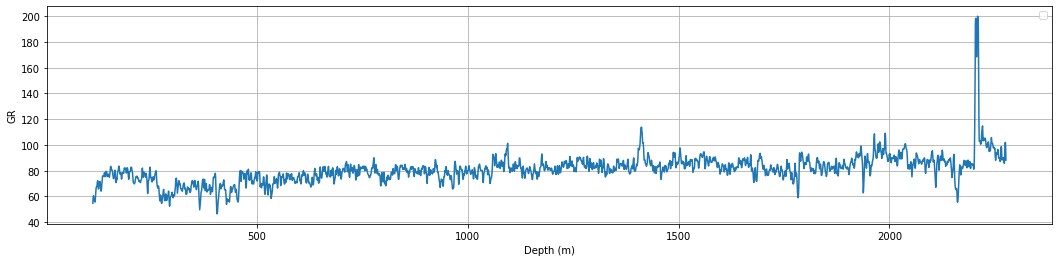

In [ ]:
data2['GR'] = data2['GR']#.rolling(100).mean()
plot_log(data2,'GR')

In [ ]:
!pip install dtw-python

     |████████████████████████████████| 573kB 6.8MB/s 


<Figure size 72x72 with 0 Axes>

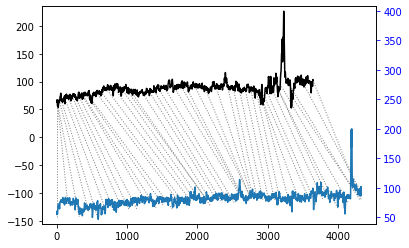

In [ ]:
## Find the best match with the canonical recursion formula
from dtw import *
formation = 'Kingak Shale'
w1 = data1#.where(data1['INTERVAL']==formation).dropna()
w2 = data2#.where(data2['INTERVAL']==formation).dropna()
w1 = np.array(w1['GR'].dropna())
w2 = np.array(w2['GR'].dropna())
alignment = dtw(w1, w2, keep_internals=True, step_pattern=rabinerJuangStepPattern(1, "c"))

## Display the warping curve, i.e. the alignment curve
plt.figure(figsize=(1,1))
ax = alignment.plot(type="twoway",offset=-200)